In [1]:
# import all the neccessary libraries which use in this bot 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import talib as ta
import MetaTrader5 as mt5
from datetime import datetime

In [2]:
# Before all the development we use MT5 platform with library which help to apply and deploy trading bot virtually in demo trading account and this step we use  
mt5.initialize()

True

In [3]:
# Login password which use to apply algo trading model and get historical data 
Login=	51526112
Password= 'UnGDEm2J'
Server= 'ICMarketsSC-Demo'

mt5.login(Login,Password,Server)

True

In [4]:
# Get Historical Data of 'BTCUSD', where there is 15 mint chart data of BTCUSD 

symbol='BTCUSD'
timeframe=mt5.TIMEFRAME_M15
date_from=datetime(2023,11,1)
date_to=datetime.now()

data=pd.DataFrame(mt5.copy_rates_range(symbol,timeframe,date_from,date_to))
data['time']=pd.to_datetime(data['time'],unit='s')
data

,time,open,high,low,close,tick_volume,spread,real_volume
0,2023-10-31 19:00:00,34276.11,34304.10,34221.34,34261.70,1849,763,0
1,2023-10-31 19:15:00,34261.80,34363.37,34260.58,34360.41,1560,977,0
2,2023-10-31 19:30:00,34355.91,34519.14,34300.06,34467.62,2118,977,0
3,2023-10-31 19:45:00,34472.87,34493.77,34405.67,34429.63,2011,852,0
4,2023-10-31 20:00:00,34429.59,34441.15,34350.27,34374.87,1677,977,0
...,...,...,...,...,...,...,...,...
5234,2023-12-25 16:45:00,43693.82,43713.22,43625.62,43676.22,1882,977,0
5235,2023-12-25 17:00:00,43675.97,43736.02,43617.07,43626.83,1928,744,0
5236,2023-12-25 17:15:00,43626.81,43738.62,43621.76,43704.48,1519,977,0
5237,2023-12-25 17:30:00,43704.73,43763.87,43643.52,43674.76,1830,979,0


In [5]:
print(data)

                    time      open      high       low     close  tick_volume  \
0    2023-10-31 19:00:00  34276.11  34304.10  34221.34  34261.70         1849   
1    2023-10-31 19:15:00  34261.80  34363.37  34260.58  34360.41         1560   
2    2023-10-31 19:30:00  34355.91  34519.14  34300.06  34467.62         2118   
3    2023-10-31 19:45:00  34472.87  34493.77  34405.67  34429.63         2011   
4    2023-10-31 20:00:00  34429.59  34441.15  34350.27  34374.87         1677   
...                  ...       ...       ...       ...       ...          ...   
5234 2023-12-25 16:45:00  43693.82  43713.22  43625.62  43676.22         1882   
5235 2023-12-25 17:00:00  43675.97  43736.02  43617.07  43626.83         1928   
5236 2023-12-25 17:15:00  43626.81  43738.62  43621.76  43704.48         1519   
5237 2023-12-25 17:30:00  43704.73  43763.87  43643.52  43674.76         1830   
5238 2023-12-25 17:45:00  43674.76  43689.27  43615.58  43628.77         1638   

      spread  real_volume  

In [6]:
# Applying 'Exponential Moving Average' on historical data using talib function and closing amount of BTCUSD

real = ta.EMA(data['close'], timeperiod=15)
data['ema']=real
data['ema']

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
5234    43512.749997
5235    43527.009997
5236    43549.193748
5237    43564.889529
5238    43572.874588
Name: ema, Length: 5239, dtype: float64

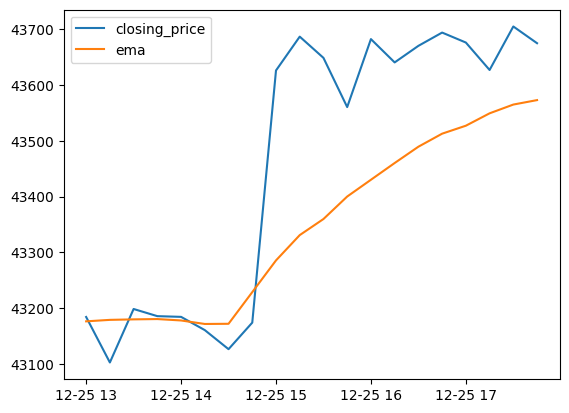

In [7]:
# Visualize EMA line with closing price and analyze them
plt.plot(data['time'].tail(20),data['open'].tail(20),label='closing_price')
plt.plot(data['time'].tail(20),data['ema'].tail(20),label='ema')
plt.legend()
plt.show()

In [8]:
# Applying 'Stocastic Relative Strength Index' indicator using talib function 'STOCHRSI' where it is formed by combination 
# two indicator one is the stocastic oscillator and second is RSI(Relative Strength Index) where the value is around 0 to 100 
# when value is below 30 or above 80 it indicate the potential bearish trend which mean oversold 
# when value is above 30 or below 40 it indicate the potential bullish trend which mean overbought  

fastk, fastd = ta.STOCHRSI(data['close'], timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)

In [9]:
fastd

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5234    41.688086
5235    30.374974
5236    26.305628
5237    26.653706
5238    26.653706
Length: 5239, dtype: float64

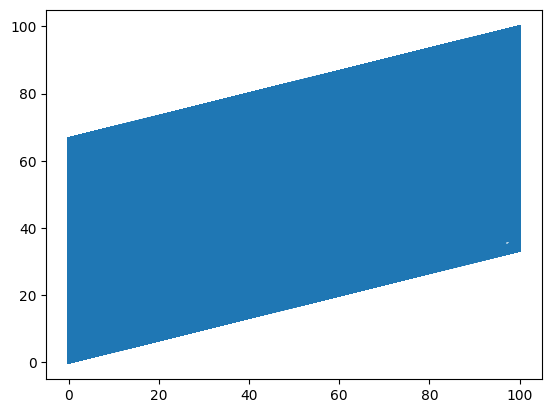

In [10]:
plt.plot(fastk,fastd)
plt.show()

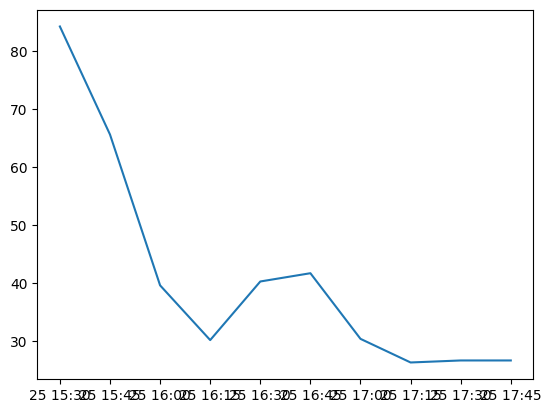

In [11]:
# Visualization of RSI Indicator 
plt.plot(data['time'].tail(10),fastd.tail(10))
plt.show()

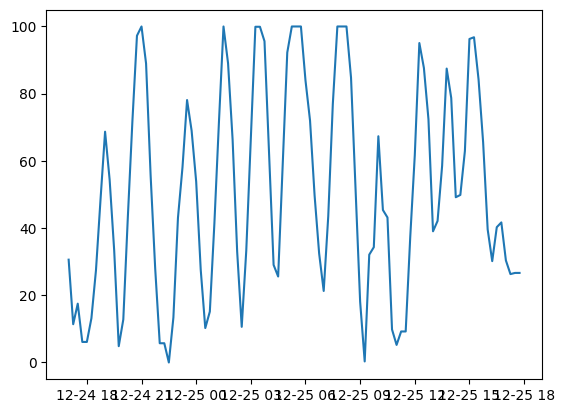

In [12]:
plt.plot(data['time'].tail(100),fastd.tail(100))
plt.show()

In [13]:
fastd

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5234    41.688086
5235    30.374974
5236    26.305628
5237    26.653706
5238    26.653706
Length: 5239, dtype: float64

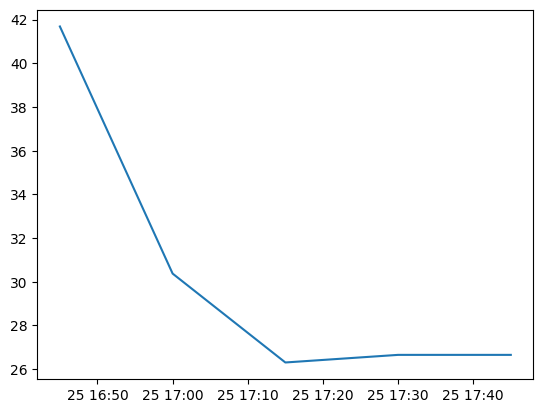

In [14]:
data['fastd']=fastd
plt.plot(data['time'].tail(),data['fastd'].tail())

In [15]:
# Applying EMA Indicator and my strategy is very simple ,when ema line below closing price is indicate buy signal and
# When ema line or value above closing price it indicate a sell signal 

buy_signal=[]
sell_signal=[]
# apple = 0
for x in range(len(data['close'])):
    if data['ema'].loc[x] > data['close'].loc[x]:
        sell_signal.append(data['ema'].loc[x])
        buy_signal.append(None)
    elif data['ema'].loc[x] < data['close'].loc[x]:
        buy_signal.append(data['ema'].loc[x])
        sell_signal.append(None)
    else:
        buy_signal.append(None)
        sell_signal.append(None)

In [16]:
data['buy_signal'] = buy_signal
data['sell_signal'] = sell_signal

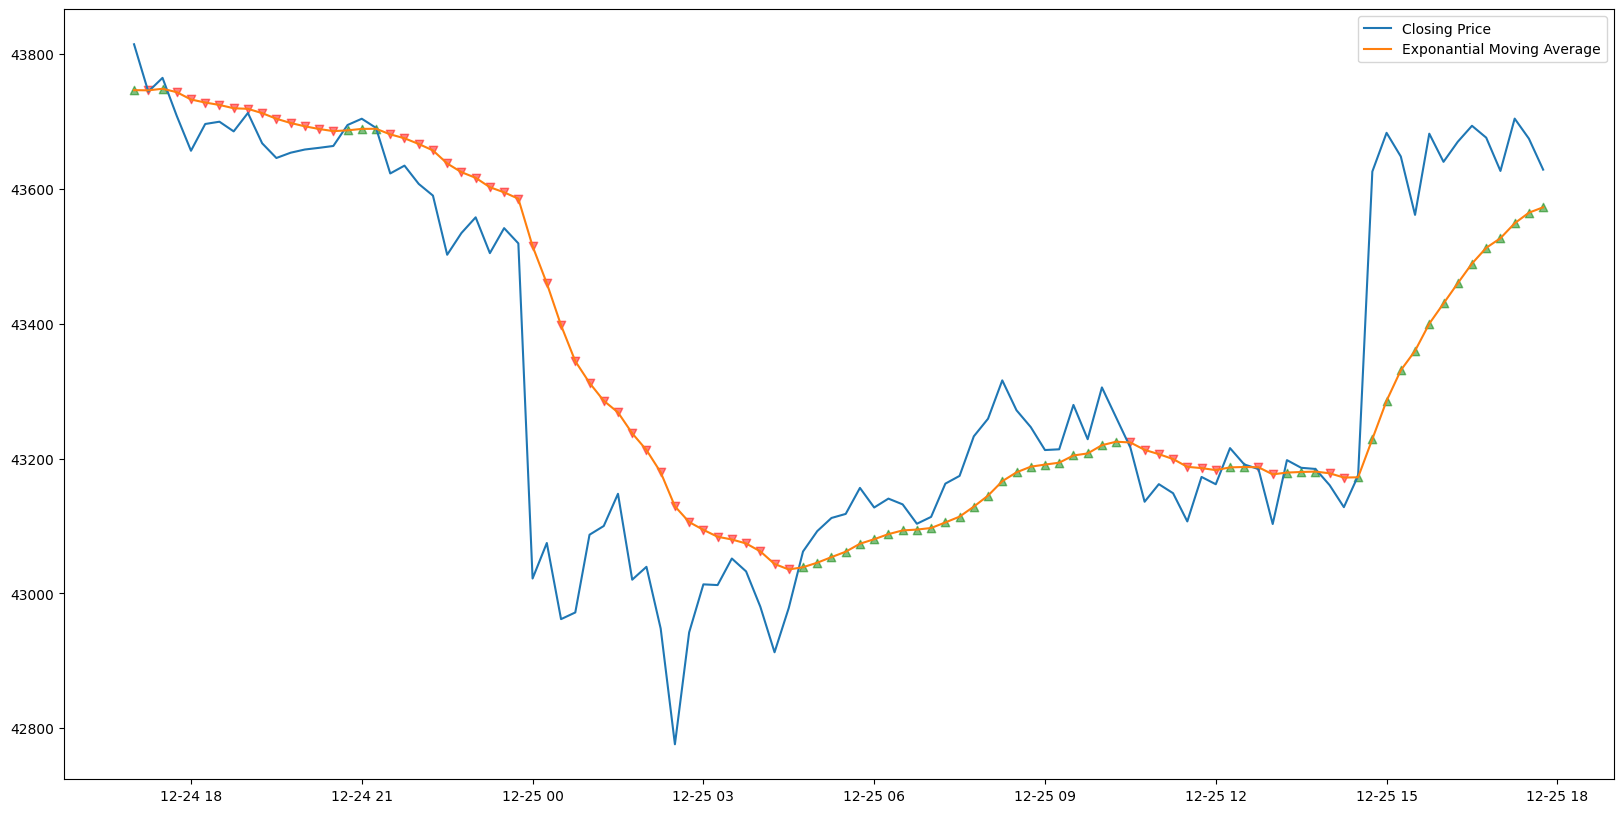

In [17]:
# Visualization 

plt.figure(figsize=(20,10))
plt.plot(data['time'].tail(100),data['close'].tail(100),label='Closing Price')
plt.plot(data['time'].tail(100),data['ema'].tail(100),label='Exponantial Moving Average')
plt.scatter(data['time'].tail(100),data['buy_signal'].tail(100),color='green',alpha=0.5,marker='^')
plt.scatter(data['time'].tail(100),data['sell_signal'].tail(100),color='red',alpha=0.5,marker='v')
plt.legend()
plt.show()

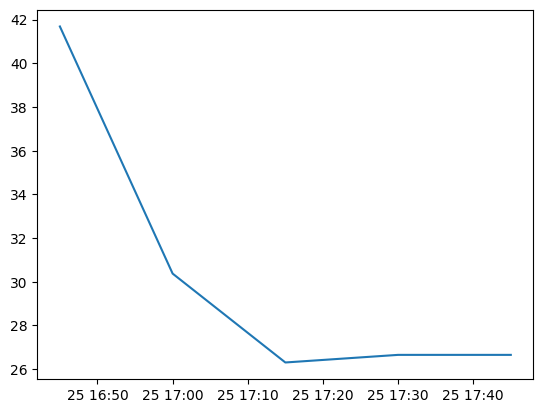

In [18]:
data['fastd']=fastd
plt.plot(data['time'].tail(),data['fastd'].tail())

In [19]:
data

,time,open,high,low,close,tick_volume,spread,real_volume,ema,fastd,buy_signal,sell_signal
0,2023-10-31 19:00:00,34276.11,34304.10,34221.34,34261.70,1849,763,0,NaN,NaN,NaN,NaN
1,2023-10-31 19:15:00,34261.80,34363.37,34260.58,34360.41,1560,977,0,NaN,NaN,NaN,NaN
2,2023-10-31 19:30:00,34355.91,34519.14,34300.06,34467.62,2118,977,0,NaN,NaN,NaN,NaN
3,2023-10-31 19:45:00,34472.87,34493.77,34405.67,34429.63,2011,852,0,NaN,NaN,NaN,NaN
4,2023-10-31 20:00:00,34429.59,34441.15,34350.27,34374.87,1677,977,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5234,2023-12-25 16:45:00,43693.82,43713.22,43625.62,43676.22,1882,977,0,43512.749997,41.688086,43512.749997,NaN
5235,2023-12-25 17:00:00,43675.97,43736.02,43617.07,43626.83,1928,744,0,43527.009997,30.374974,43527.009997,NaN
5236,2023-12-25 17:15:00,43626.81,43738.62,43621.76,43704.48,1519,977,0,43549.193748,26.305628,43549.193748,NaN
5237,2023-12-25 17:30:00,43704.73,43763.87,43643.52,43674.76,1830,979,0,43564.889529,26.653706,43564.889529,NaN


In [20]:
data.to_csv('Bitcoin_15min_chart.csv')

In [21]:
# Applying Double Exponential Moving average line of 15 days period which is causual 

dema = ta.DEMA(data['close'], timeperiod=15)
dema

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
5234    43678.571873
5235    43684.581640
5236    43706.479716
5237    43716.248560
5238    43712.300667
Length: 5239, dtype: float64

In [22]:
# Applying Simple Moving Average Line which is very Useful 

sma_5=ta.SMA(data['close'], timeperiod=5)
sma_15=ta.SMA(data['close'], timeperiod=15)

In [23]:
# Applying strategy:
# When 5 days of SMA cross the 15 days of SMA it indicate a buy signal
# When 15 days of SMA cross the 5 days of SMA it indicate a sell signal

data['sma_5']=sma_5
data['sma_15']=sma_15

sma_buy=[]
sma_sell=[]
# apple = 0
for x in range(len(data['close'])):
    if data['sma_15'].loc[x] > data['sma_5'].loc[x]:
        sma_sell.append(data['sma_15'].loc[x])
        sma_buy.append(None)
    elif data['sma_15'].loc[x] < data['sma_5'].loc[x]:
        sma_buy.append(data['sma_5'].loc[x])
        sma_sell.append(None)
    else:
        sma_buy.append(None)
        sma_sell.append(None)

In [24]:
data['sma_buy']=sma_buy
data['sma_sell']=sma_sell

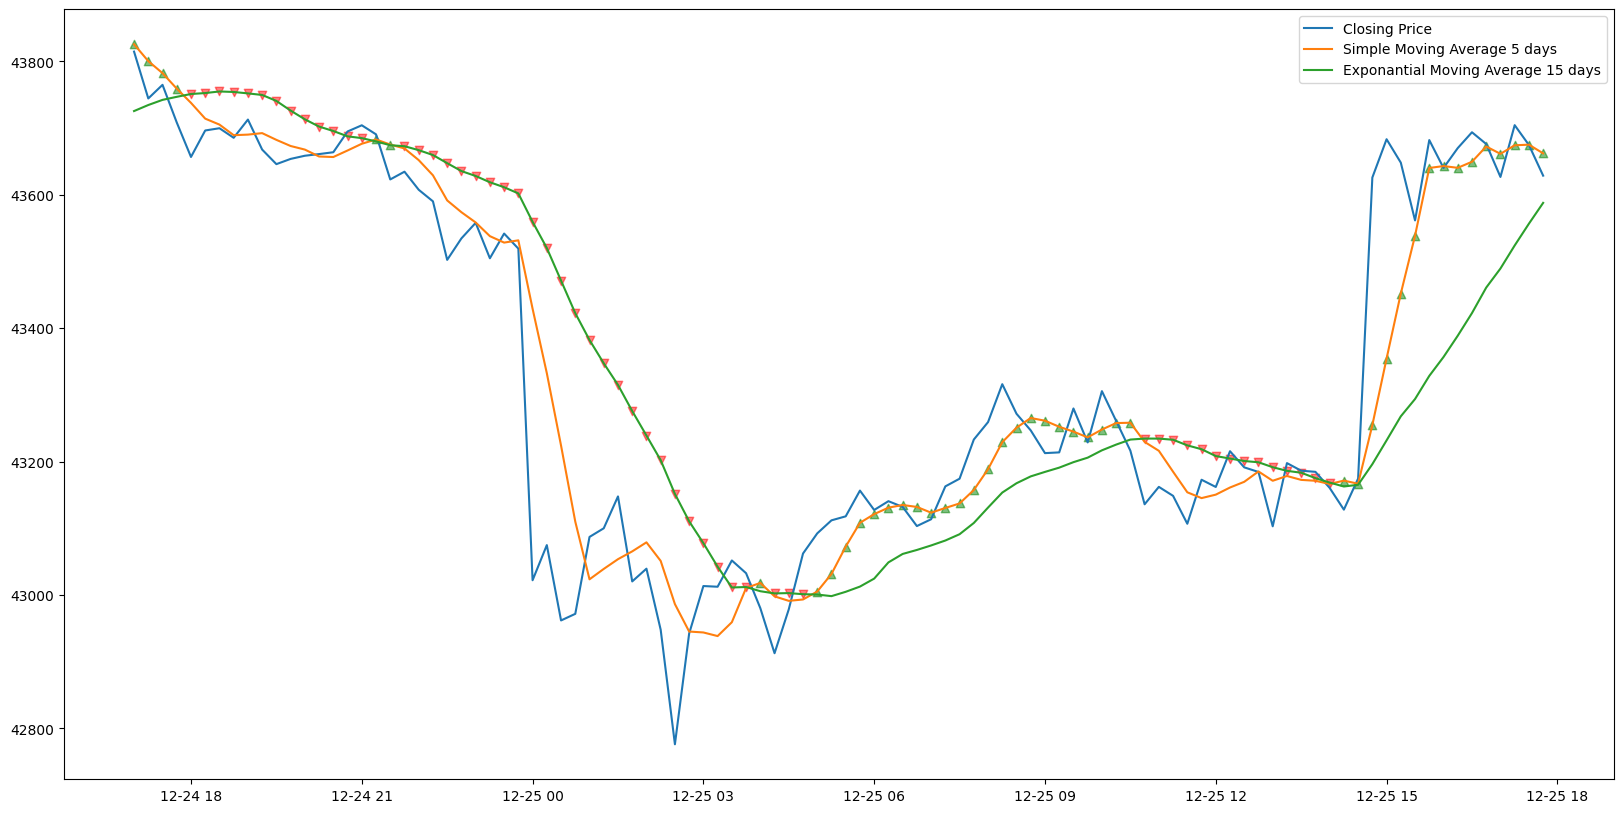

In [25]:
# Visualization 

plt.figure(figsize=(20,10))
plt.plot(data['time'].tail(100),data['close'].tail(100),label='Closing Price')
plt.plot(data['time'].tail(100),data['sma_5'].tail(100),label='Simple Moving Average 5 days')
plt.plot(data['time'].tail(100),data['sma_15'].tail(100),label='Exponantial Moving Average 15 days')
plt.scatter(data['time'].tail(100),data['sma_buy'].tail(100),color='green',alpha=0.5,marker='^')
plt.scatter(data['time'].tail(100),data['sma_sell'].tail(100),color='red',alpha=0.5,marker='v')
plt.legend()
plt.show()

In [26]:
# Applying two pattern using talib lib 'hammer and two crows' candle stick pattern
pattern_1 = ta.CDL2CROWS(data['open'], data['high'], data['low'], data['close'])
pattern_2 = ta.CDLHAMMER(data['open'], data['high'], data['low'], data['close'])

In [27]:
pattern_1

0       0
1       0
2       0
3       0
4       0
       ..
5234    0
5235    0
5236    0
5237    0
5238    0
Length: 5239, dtype: int32

In [28]:
# Engulfing Pattern 

engulfing = ta.CDLENGULFING(data['open'], data['high'], data['low'], data['close'])
engulfing

0         0
1         0
2         0
3         0
4         0
       ... 
5234      0
5235      0
5236    100
5237      0
5238      0
Length: 5239, dtype: int32

In [29]:
pattern_2[pattern_2==100]

144     100
159     100
176     100
186     100
220     100
       ... 
5064    100
5141    100
5173    100
5176    100
5232    100
Length: 121, dtype: int32

In [30]:
pattern_1[pattern_1<0]

646   -100
dtype: int32

In [31]:
engulfing[engulfing==100]

15      100
49      100
56      100
99      100
109     100
       ... 
5214    100
5216    100
5225    100
5230    100
5236    100
Length: 262, dtype: int32

In [32]:
data['hammer']=pattern_2
data['engulfing']=engulfing

In [33]:
pattern_2[pattern_2==100]

144     100
159     100
176     100
186     100
220     100
       ... 
5064    100
5141    100
5173    100
5176    100
5232    100
Length: 121, dtype: int32

In [34]:
# Identifying 'Hammer Candlestick Pattern' using ta lib function and there is practical demonstration where value 100 is detected pattern
# and value 0 is not detected where algorithm work buy and sell position
# But there is another issue of algo is not find pattern honestly that's why buy and sell signal isn't accurate 
hamm_buy=[]
hamm_sell=[]
# apple = 0
for x in range(len(data['close'])):
    if data['hammer'].loc[x] < 100:
        hamm_sell.append(data['close'].loc[x])
        hamm_buy.append(None)
    elif data['hammer'].loc[x] == 100:
        hamm_buy.append(data['close'].loc[x])
        hamm_sell.append(None)
    else:
        hamm_buy.append(None)
        hamm_sell.append(None)

In [35]:
hamm_buy

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

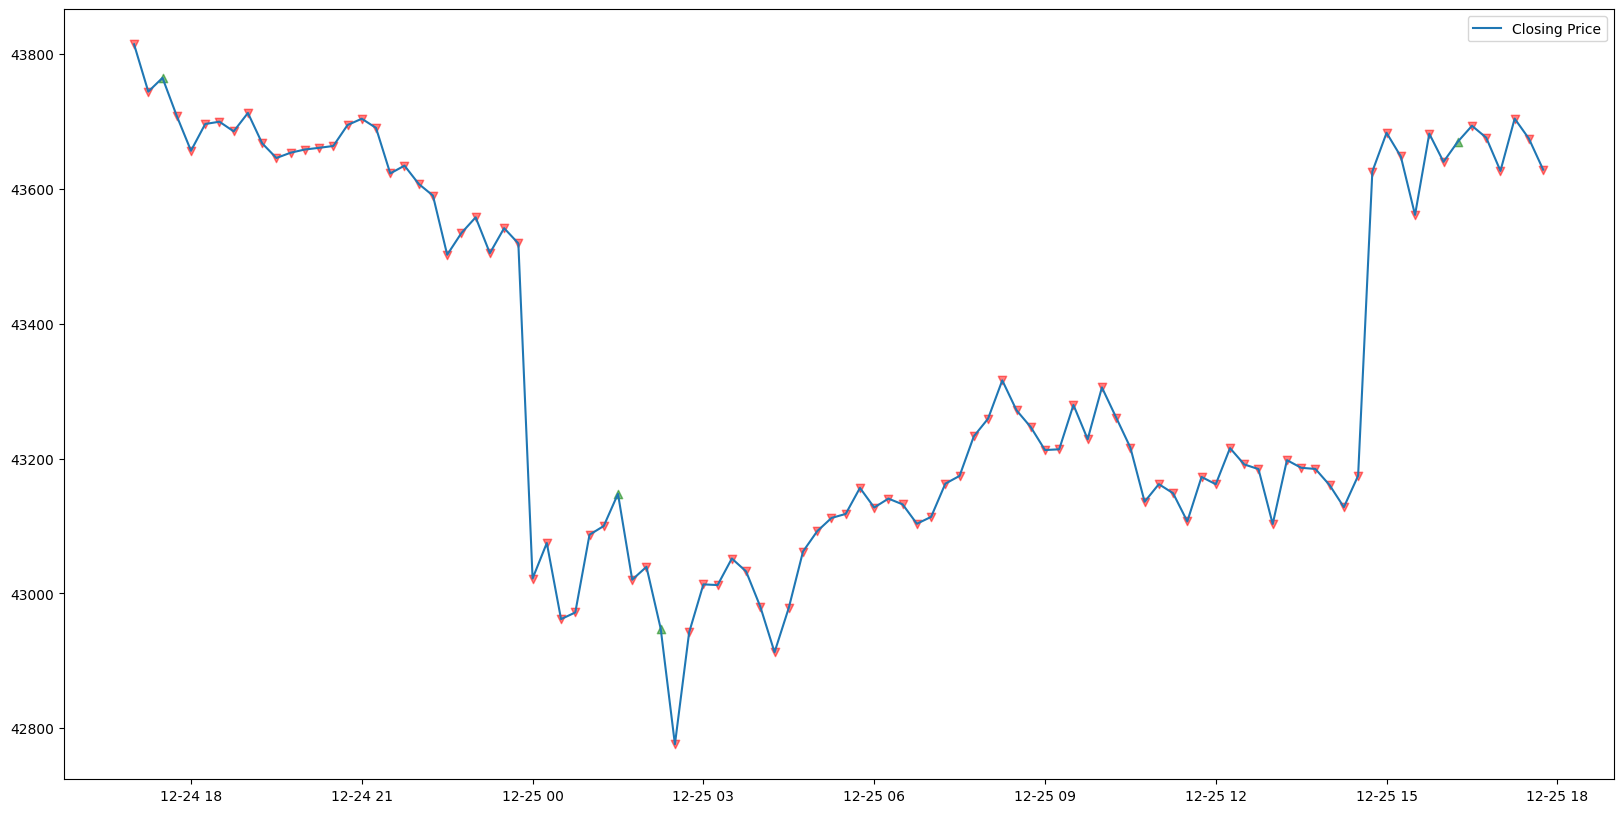

In [36]:
data['hamm_buy']=hamm_buy
data['hamm_sell']=hamm_sell
plt.figure(figsize=(20,10))
plt.plot(data['time'].tail(100),data['close'].tail(100),label='Closing Price')
plt.scatter(data['time'].tail(100),data['hamm_buy'].tail(100),color='green',alpha=0.5,marker='^')
plt.scatter(data['time'].tail(100),data['hamm_sell'].tail(100),color='red',alpha=0.5,marker='v')
plt.legend()
plt.show()

In [37]:
data[data['hammer']==100]

,time,open,high,low,close,tick_volume,spread,real_volume,ema,fastd,buy_signal,sell_signal,sma_5,sma_15,sma_buy,sma_sell,hammer,engulfing,hamm_buy,hamm_sell
144,2023-11-02 07:00:00,35590.82,35622.38,35496.23,35610.12,2222,978,0,35584.828278,2.439979e+00,35584.828278,NaN,35650.298,35600.766000,35650.298,NaN,100,0,35610.12,NaN
159,2023-11-02 10:45:00,35301.47,35310.25,35226.76,35282.89,1850,991,0,35325.984615,6.993829e+01,NaN,35325.984615,35293.176,35309.967333,NaN,35309.967333,100,0,35282.89,NaN
176,2023-11-02 15:00:00,35390.49,35396.62,35319.15,35370.63,2214,978,0,35372.736209,6.282597e+01,NaN,35372.736209,35378.134,35375.454000,35378.134,NaN,100,0,35370.63,NaN
186,2023-11-02 17:30:00,34851.49,34932.19,34729.43,34919.03,3096,729,0,35118.814573,4.210835e+01,NaN,35118.814573,34895.222,35192.346667,NaN,35192.346667,100,0,34919.03,NaN
220,2023-11-03 02:00:00,34792.61,34797.52,34698.93,34776.37,1452,977,0,34856.290138,-2.368476e-15,NaN,34856.290138,34825.806,34895.565333,NaN,34895.565333,100,0,34776.37,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5064,2023-12-23 22:15:00,43706.21,43712.93,43659.28,43708.06,1626,1014,0,43754.831342,4.941052e-01,NaN,43754.831342,43737.164,43771.544000,NaN,43771.544000,100,0,43708.06,NaN
5141,2023-12-24 17:30:00,43744.38,43770.43,43694.67,43764.93,1410,941,0,43748.744163,1.750013e+01,43748.744163,NaN,43782.470,43742.387333,43782.470,NaN,100,0,43764.93,NaN
5173,2023-12-25 01:30:00,43100.41,43155.86,43043.62,43147.80,2057,988,0,43268.594989,1.000000e+02,NaN,43268.594989,43053.706,43314.976667,NaN,43314.976667,100,0,43147.80,NaN
5176,2023-12-25 02:15:00,43039.47,43045.17,42853.30,42947.89,1939,902,0,43179.690413,3.299374e+01,NaN,43179.690413,43051.114,43202.137333,NaN,43202.137333,100,0,42947.89,NaN


In [38]:
# Identifying 'engulfing candlestick pattern' using ta lib function and there is practical demonstration where 
# value 100 is detected pattern of bullish engulfing or bullish reversal and 
# value -100 is detected pattern of bearish engulfing or bearish reversal and value 0 is not detected where 
# algorithm work buy and sell position

bull=[]
bear=[]
# apple = 0
for x in range(len(data['close'])):
    if data['engulfing'].loc[x]==-100:
        bear.append(data['close'].loc[x])
        bull.append(None)
    elif data['engulfing'].loc[x] == 100:
        bull.append(data['close'].loc[x])
        bear.append(None)
    else:
        bull.append(None)
        bear.append(None)

data['bull']=bull
data['bear']=bear

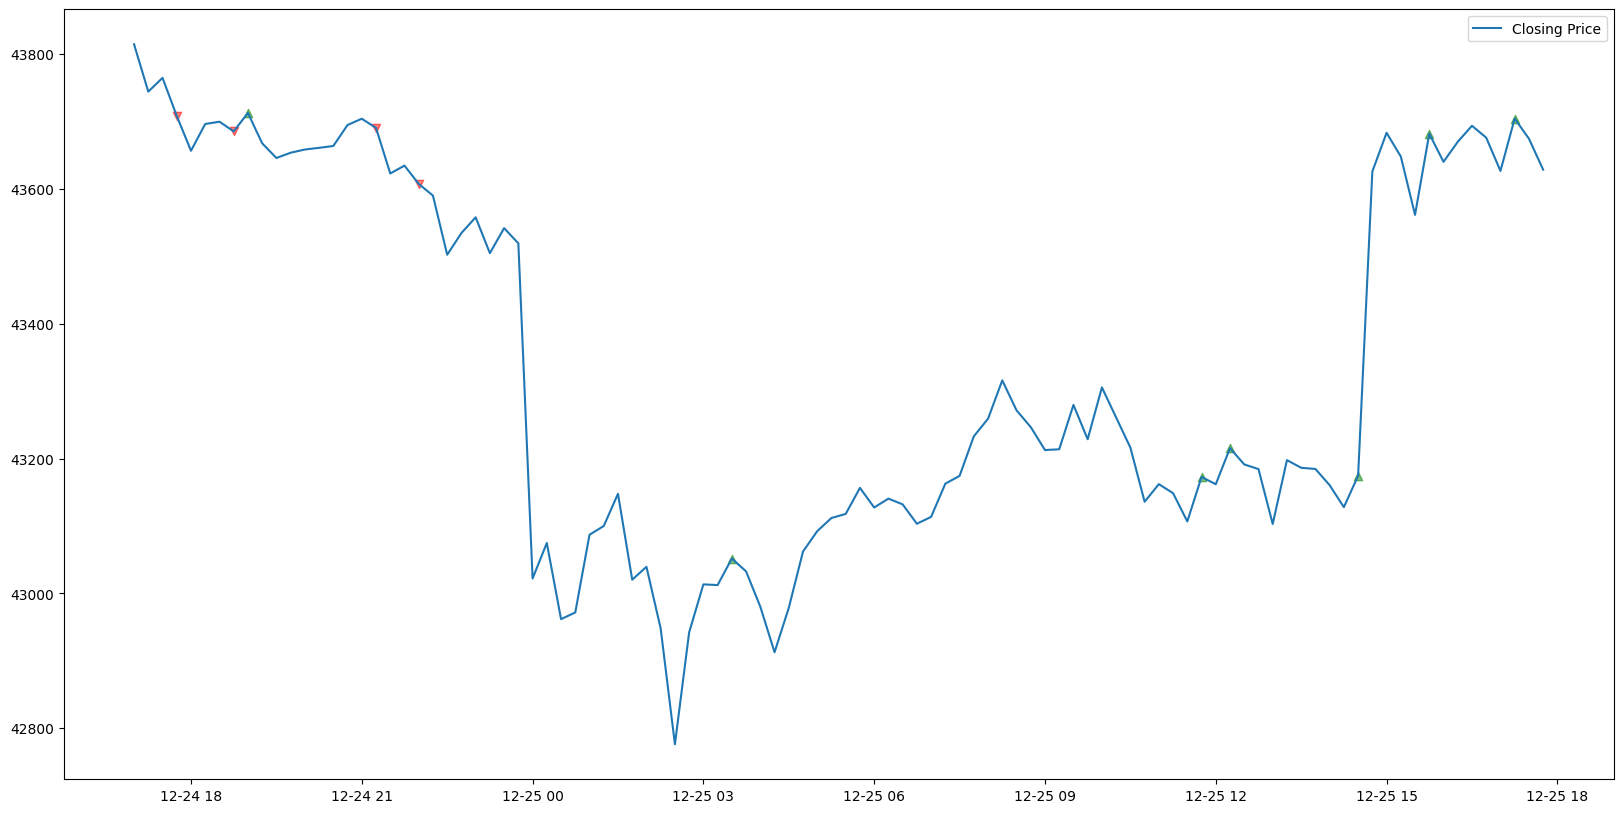

In [39]:
plt.figure(figsize=(20,10))
plt.plot(data['time'].tail(100),data['close'].tail(100),label='Closing Price')
plt.scatter(data['time'].tail(100),data['bull'].tail(100),color='green',alpha=0.5,marker='^')
plt.scatter(data['time'].tail(100),data['bear'].tail(100),color='red',alpha=0.5,marker='v')
plt.legend()
plt.show()

In [44]:
df=data[['time','close']]

In [45]:
df.rename(columns={'time':'ds','close':'y'},inplace=True)
df

C:\Users\Faizan\AppData\Local\Temp\ipykernel_2796\610829633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'time':'ds','close':'y'},inplace=True)


,ds,y
0,2023-10-31 19:00:00,34261.70
1,2023-10-31 19:15:00,34360.41
2,2023-10-31 19:30:00,34467.62
3,2023-10-31 19:45:00,34429.63
4,2023-10-31 20:00:00,34374.87
...,...,...
5234,2023-12-25 16:45:00,43676.22
5235,2023-12-25 17:00:00,43626.83
5236,2023-12-25 17:15:00,43704.48
5237,2023-12-25 17:30:00,43674.76


In [51]:
# Import Prophet(Time Series Forcasting Model) and its visualization sub-library

from prophet import Prophet 
from prophet.plot import plot_plotly, plot_components_plotly

In [55]:
# Applying Prophet Model and training the data using .fit() method 

model=Prophet()
model.fit(df)

22:58:24 - cmdstanpy - INFO - Chain [1] start processing
22:58:28 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
future = model.make_future_dataframe(periods=15)
future

,ds
0,2023-10-31 19:00:00
1,2023-10-31 19:15:00
2,2023-10-31 19:30:00
3,2023-10-31 19:45:00
4,2023-10-31 20:00:00
...,...
5249,2024-01-05 17:45:00
5250,2024-01-06 17:45:00
5251,2024-01-07 17:45:00
5252,2024-01-08 17:45:00


In [60]:
# Predict the closing price 

forecast=model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-10-31 19:00:00,34719.255180,33793.080073,34716.462756,34719.255180,34719.255180,-460.708907,-460.708907,-460.708907,-47.045563,-47.045563,-47.045563,-413.663343,-413.663343,-413.663343,0.0,0.0,0.0,34258.546273
1,2023-10-31 19:15:00,34716.374656,33800.684744,34709.811974,34716.374656,34716.374656,-454.955538,-454.955538,-454.955538,-45.036812,-45.036812,-45.036812,-409.918726,-409.918726,-409.918726,0.0,0.0,0.0,34261.419118
2,2023-10-31 19:30:00,34713.494133,33830.871607,34701.008816,34713.494133,34713.494133,-448.085618,-448.085618,-448.085618,-42.009625,-42.009625,-42.009625,-406.075994,-406.075994,-406.075994,0.0,0.0,0.0,34265.408515
3,2023-10-31 19:45:00,34710.613610,33802.579032,34686.800186,34710.613610,34710.613610,-440.145276,-440.145276,-440.145276,-38.011845,-38.011845,-38.011845,-402.133432,-402.133432,-402.133432,0.0,0.0,0.0,34270.468334
4,2023-10-31 20:00:00,34707.733087,33815.756584,34727.314160,34707.733087,34707.733087,-431.212633,-431.212633,-431.212633,-33.123258,-33.123258,-33.123258,-398.089375,-398.089375,-398.089375,0.0,0.0,0.0,34276.520454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,2024-01-05 17:45:00,46199.856082,28569.991250,66142.767563,28323.604791,65985.852478,241.470619,241.470619,241.470619,-42.512625,-42.512625,-42.512625,283.983244,283.983244,283.983244,0.0,0.0,0.0,46441.326702
5250,2024-01-06 17:45:00,46398.556173,26319.917296,68620.454621,26119.096237,68539.199672,94.853852,94.853852,94.853852,-42.512625,-42.512625,-42.512625,137.366477,137.366477,137.366477,0.0,0.0,0.0,46493.410026
5251,2024-01-07 17:45:00,46597.256264,23388.826346,70395.909907,23815.751549,71180.496331,-563.449855,-563.449855,-563.449855,-42.512625,-42.512625,-42.512625,-520.937230,-520.937230,-520.937230,0.0,0.0,0.0,46033.806410
5252,2024-01-08 17:45:00,46795.956355,20822.500481,73262.533158,21379.097935,73988.987536,-659.196377,-659.196377,-659.196377,-42.512625,-42.512625,-42.512625,-616.683753,-616.683753,-616.683753,0.0,0.0,0.0,46136.759978


C:\Users\Faizan\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Faizan\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


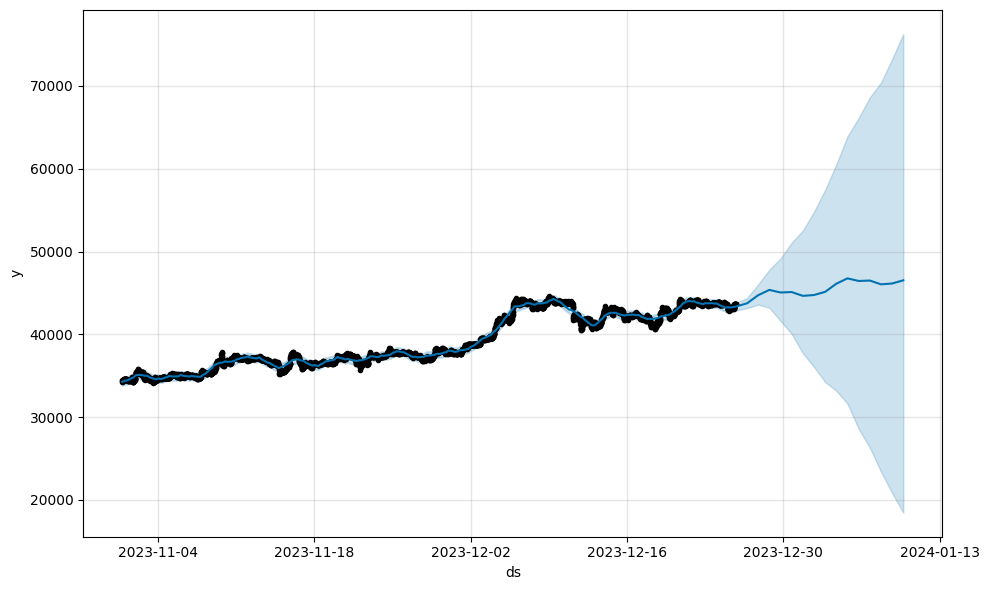

In [62]:
fig1 = model.plot(forecast)

C:\Users\Faizan\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Faizan\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\Faizan\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

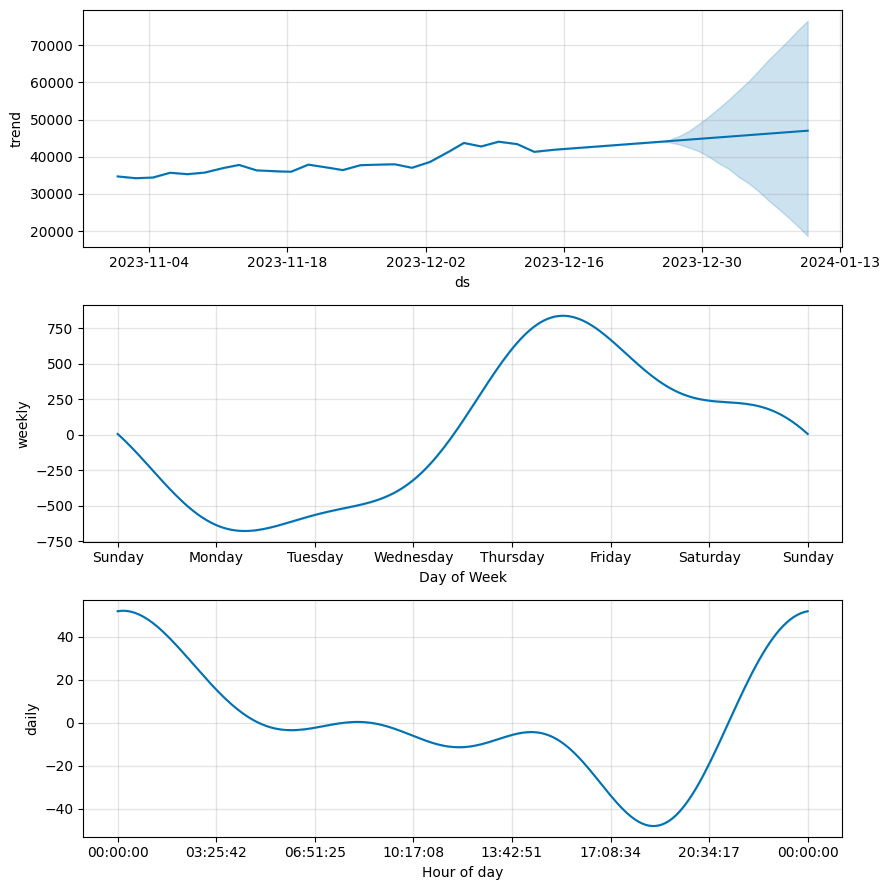

In [64]:
fig2 = model.plot_components(forecast)

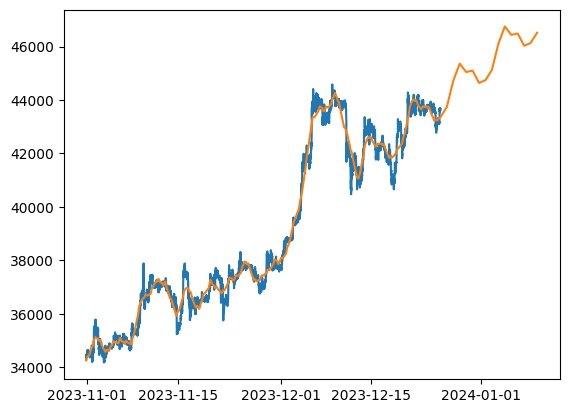

In [71]:
plt.plot(df['ds'],df['y'])
plt.plot(forecast['ds'],forecast['yhat'])
plt.show()

<bound method Prophet.add_seasonality of <prophet.forecaster.Prophet object at 0x000002907B9500D0>>

In [ ]:
model